# Overview
This jupyter notebook covers the following contents:
1. Default configuration in LIBERO
2. Basic information about available LIBERO benchmarks
   - Get a dictionary of mapping from benchmark name to benchmark class
   - Check the integrity of benchmarks
   - Check the integrity of init files
   - Visualize all the init states of a task
   - Download datasets
   - Get information about a demonstration file and replay a trajectory


In [2]:
from libero.libero import benchmark, get_libero_path, set_libero_default_path
import os
from termcolor import colored

## 1. Default file paths

All the paths are retrieved from a yaml config file located at `~/.libero/config.yaml`. And the default paths are set to relative to the libero codebase.

In [3]:
benchmark_root_path = get_libero_path("benchmark_root")
init_states_default_path = get_libero_path("init_states")
datasets_default_path = get_libero_path("datasets")
bddl_files_default_path = get_libero_path("bddl_files")
print("Default benchmark root path: ", benchmark_root_path)
print("Default dataset root path: ", datasets_default_path)
print("Default bddl files root path: ", bddl_files_default_path)

Default benchmark root path:  /home/axj200012/programming/LIBERO/libero/libero
Default dataset root path:  /home/axj200012/programming/LIBERO/libero/libero/../datasets
Default bddl files root path:  /home/axj200012/programming/LIBERO/libero/libero/./bddl_files


Now if you want to point your codebase to custom path, you can use `set_libero_path` function to do that. Notice that all the paths change according to `benchmark_root` value.

In [4]:
set_libero_default_path(os.path.join(os.path.expanduser("~"), "custom_project"))
benchmark_root_path = get_libero_path("benchmark_root")
init_states_default_path = get_libero_path("init_states")
datasets_default_path = get_libero_path("datasets")
bddl_files_default_path = get_libero_path("bddl_files")
print("Default benchmark root path: ", benchmark_root_path)
print("Default dataset root path: ", datasets_default_path)
print("Default bddl files root path: ", bddl_files_default_path)

# If nothing is specified in the `set_libero_default_path` function, the path will be changed back to the default path
# We will set back the path to the default path for the subsequent examples
set_libero_default_path()
benchmark_root_path = get_libero_path("benchmark_root")
init_states_default_path = get_libero_path("init_states")
datasets_default_path = get_libero_path("datasets")
bddl_files_default_path = get_libero_path("bddl_files")
print("Default benchmark root path: ", benchmark_root_path)
print("Default dataset root path: ", datasets_default_path)
print("Default bddl files root path: ", bddl_files_default_path)

[Warning] You are changing the default path for Libero config. This will affect all the paths in the config file.
[Warning]: assets path /home/axj200012/custom_project/./assets does not exist!
[Warning]: bddl_files path /home/axj200012/custom_project/./bddl_files does not exist!
[Warning]: benchmark_root path /home/axj200012/custom_project does not exist!
[Warning]: datasets path /home/axj200012/custom_project/../datasets does not exist!
[Warning]: init_states path /home/axj200012/custom_project/./init_files does not exist!
[Warning]: assets path /home/axj200012/custom_project/./assets does not exist!
[Warning]: bddl_files path /home/axj200012/custom_project/./bddl_files does not exist!
[Warning]: benchmark_root path /home/axj200012/custom_project does not exist!
[Warning]: datasets path /home/axj200012/custom_project/../datasets does not exist!
[Warning]: init_states path /home/axj200012/custom_project/./init_files does not exist!
[Warning]: assets path /home/axj200012/custom_project/

# 2. See available benchmarks

### 2.1 Get a dictionary of mapping from benchmark name to benchmark class

In [5]:
benchmark_dict = benchmark.get_benchmark_dict()
print(benchmark_dict)

{'libero_spatial': <class 'libero.libero.benchmark.LIBERO_SPATIAL'>, 'libero_object': <class 'libero.libero.benchmark.LIBERO_OBJECT'>, 'libero_goal': <class 'libero.libero.benchmark.LIBERO_GOAL'>, 'libero_90': <class 'libero.libero.benchmark.LIBERO_90'>, 'libero_10': <class 'libero.libero.benchmark.LIBERO_10'>, 'libero_100': <class 'libero.libero.benchmark.LIBERO_100'>}


### 2.2 Check the integrity of benchmarks

In [6]:
# initialize a benchmark
benchmark_instance = benchmark_dict["libero_10"]()
num_tasks = benchmark_instance.get_num_tasks()
# see how many tasks involved in the benchmark
print(f"{num_tasks} tasks in the benchmark {benchmark_instance.name}: ")

# Check if all the task names and their bddl file names
task_names = benchmark_instance.get_task_names()
print("The benchmark contains the following tasks:")
for i in range(num_tasks):
    task_name = task_names[i]
    task = benchmark_instance.get_task(i)
    bddl_file = os.path.join(bddl_files_default_path, task.problem_folder, task.bddl_file)
    print(f"\t {task_name}, detail definition stored in {bddl_file}")
    if not os.path.exists(bddl_file):
        print(colored(f"[error] bddl file {bddl_file} cannot be found. Check your paths", "red"))

[info] using task orders [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
10 tasks in the benchmark libero_10: 
The benchmark contains the following tasks:
	 LIVING_ROOM_SCENE2_put_both_the_alphabet_soup_and_the_tomato_sauce_in_the_basket, detail definition stored in /home/axj200012/programming/LIBERO/libero/libero/./bddl_files/libero_10/LIVING_ROOM_SCENE2_put_both_the_alphabet_soup_and_the_tomato_sauce_in_the_basket.bddl
	 LIVING_ROOM_SCENE2_put_both_the_cream_cheese_box_and_the_butter_in_the_basket, detail definition stored in /home/axj200012/programming/LIBERO/libero/libero/./bddl_files/libero_10/LIVING_ROOM_SCENE2_put_both_the_cream_cheese_box_and_the_butter_in_the_basket.bddl
	 KITCHEN_SCENE3_turn_on_the_stove_and_put_the_moka_pot_on_it, detail definition stored in /home/axj200012/programming/LIBERO/libero/libero/./bddl_files/libero_10/KITCHEN_SCENE3_turn_on_the_stove_and_put_the_moka_pot_on_it.bddl
	 KITCHEN_SCENE4_put_the_black_bowl_in_the_bottom_drawer_of_the_cabinet_and_close_it, detail definit

### 2.3 Check the integrity of init files

In [7]:
# Check if all the init states files exist for tasks
task_names = benchmark_instance.get_task_names()
print("The benchmark contains the following tasks:")
for i in range(num_tasks):
    task_name = task_names[i]
    task = benchmark_instance.get_task(i)
    init_states_path = os.path.join(init_states_default_path, task.problem_folder, task.init_states_file)
    if not os.path.exists(init_states_path):
        print(colored(f"[error] the init states {init_states_path} cannot be found. Check your paths", "red"))
print(f"An example of init file is named like this: {task.init_states_file}")

# Load torch init files
init_states = benchmark_instance.get_task_init_states(0)
# Init states in the same (num_init_rollouts, num_simulation_states)
print(init_states.shape)


The benchmark contains the following tasks:
An example of init file is named like this: KITCHEN_SCENE6_put_the_yellow_and_white_mug_in_the_microwave_and_close_it.pruned_init
(50, 123)


### 2.4 Visualize all the init states of a task

In [8]:
def create_video(images: list, name: str = "recording", show: bool = False):
    video_writer = imageio.get_writer("output.mp4", fps=60)
    for image in images:
        video_writer.append_data(image[::-1])
    video_writer.close()

    if show:
        HTML("""
            <video width="640" height="480" controls>
                <source src="output.mp4" type="video/mp4">
            </video>
            <script>
                var video = document.getElementsByTagName('video')[0];
                video.playbackRate = 2.0; // Increase the playback speed to 2x
                </script>    
        """)

### 2.5 Download datasets

In [9]:
import libero.libero.utils.download_utils as download_utils

datasets = "libero_spatial" # Can specify "all", "libero_goal", "libero_spatial", "libero_object", "libero_100"
benchmark_instance = benchmark_dict[datasets]()
demo_files = [os.path.join(datasets_default_path, benchmark_instance.get_task_demonstration(i)) for i in range(num_tasks)]

[info] using task orders [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


### 2.6 Get information about a demonstration file and replay a trajectory

In [10]:
import h5py
from libero.libero.utils.dataset_utils import get_dataset_info
from IPython.display import HTML
import imageio
from pathlib import Path
import json
from libero.libero.envs import OffScreenRenderEnv
from IPython.display import display
from PIL import Image
from robosuite.utils.camera_utils import get_camera_intrinsic_matrix
import torch
import torchvision

demo_file = Path(demo_files[0])
bddl_path = str(Path(bddl_files_default_path) / demo_file.parent.stem / (demo_file.stem[:-5] + '.bddl'))

f = h5py.File(demo_file, "r")

env_metadata = json.loads(f["data"].attrs["env_args"])
env_kwargs = env_metadata['env_kwargs']
env_kwargs['controller'] = env_kwargs.pop('controller_configs')['type']
env_kwargs['camera_depths'] = True
env_kwargs['bddl_file_name'] = bddl_path

env = OffScreenRenderEnv(**env_kwargs)
env.seed(0)



data = f['data']
demo = data['demo_0']
states = demo['states'][()]
f.close()

for state in states:
    obs = env.set_init_state(state)
    rgb_img, depth_img = obs['agentview_image'], obs['agentview_depth']

[robosuite WARNING] No private macro file found! (macros.py:53)
[robosuite WARNING] It is recommended to use a private macro file (macros.py:54)
[robosuite WARNING] To setup, run: python /home/axj200012/miniconda3/envs/libero/lib/python3.8/site-packages/robosuite/scripts/setup_macros.py (macros.py:55)


In [15]:
import matplotlib.pyplot as plt
import open3d as o3d
import numpy as np

In [63]:
def cammat2o3d(cam_mat, width, height):
    cx = cam_mat[0,2]
    fx = cam_mat[0,0]
    cy = cam_mat[1,2]
    fy = cam_mat[1,1]

    return o3d.camera.PinholeCameraIntrinsic(width, height, fx, fy, cx, cy)

def verticalFlip(img):
    return np.flip(img, axis=0)

def get_camera_position(sim, camera_name):
    camera_id = sim.model.camera_name2id(camera_name)
    camera_pos = sim.model.body_pos[camera_id]
    return camera_pos

def rotMatList2NPRotMat(rot_mat_arr):
    np_rot_arr = np.array(rot_mat_arr)
    np_rot_mat = np_rot_arr.reshape((3, 3))
    return np_rot_mat

def quat2Mat(quat):
    if len(quat) != 4:
        print("Quaternion", quat, "invalid when generating transformation matrix.")
        raise ValueError

    # Note that the following code snippet can be used to generate the 3x3
    #    rotation matrix, we don't use it because this file should not depend
    #    on mujoco.
    '''
    from mujoco_py import functions
    res = np.zeros(9)
    functions.mju_quat2Mat(res, camera_quat)
    res = res.reshape(3,3)
    '''

    # This function is lifted directly from scipy source code
    #https://github.com/scipy/scipy/blob/v1.3.0/scipy/spatial/transform/rotation.py#L956
    w = quat[0]
    x = quat[1]
    y = quat[2]
    z = quat[3]

    x2 = x * x
    y2 = y * y
    z2 = z * z
    w2 = w * w

    xy = x * y
    zw = z * w
    xz = x * z
    yw = y * w
    yz = y * z
    xw = x * w

    rot_mat_arr = [x2 - y2 - z2 + w2, 2 * (xy - zw), 2 * (xz + yw), \
        2 * (xy + zw), - x2 + y2 - z2 + w2, 2 * (yz - xw), \
        2 * (xz - yw), 2 * (yz + xw), - x2 - y2 + z2 + w2]
    np_rot_mat = rotMatList2NPRotMat(rot_mat_arr)
    return np_rot_mat

def posRotMat2Mat(pos, rot_mat):
    t_mat = np.eye(4)
    t_mat[:3, :3] = rot_mat
    t_mat[:3, 3] = np.array(pos)
    return t_mat

In [64]:
camera_height, camera_width = env_kwargs['camera_heights'], env_kwargs['camera_widths']

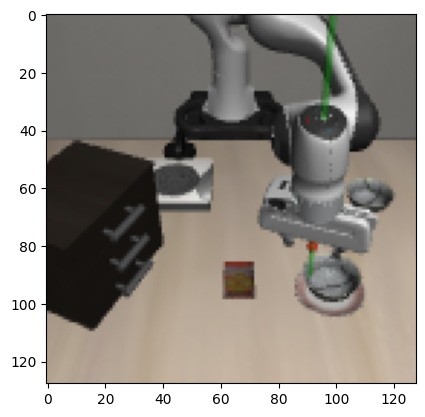

In [65]:
plt.imshow(verticalFlip(rgb_img));

In [78]:
camera_names = [name.replace("_depth", "") for name in obs.keys() if 'depth' in name]

In [93]:
o3d_clouds = []
rgb_imgs = []
camera_name = camera_names[0]

rgb_img, depth_img = obs[camera_name + "_image"], obs[camera_name + "_depth"]
intrinsic_matrix = get_camera_intrinsic_matrix(env.sim, camera_name, camera_height, camera_width)
cam_pos = get_camera_position(env.sim, camera_name)
od_cammat = cammat2o3d(intrinsic_matrix, camera_height, camera_width)
od_depth = o3d.geometry.Image(depth_img)
o3d_cloud = o3d.geometry.PointCloud.create_from_depth_image(od_depth, od_cammat)
c2b_r = rotMatList2NPRotMat(intrinsic_matrix)
camera_id = env.sim.model.camera_name2id(camera_name)
c2b_r = rotMatList2NPRotMat(env.sim.model.cam_mat0[camera_id])
b2w_r = quat2Mat([0, 1, 0, 0])
c2w_r = np.matmul(c2b_r, b2w_r)
c2w = posRotMat2Mat(cam_pos, c2w_r)
transformed_cloud = o3d_cloud.transform(c2w)
o3d_clouds.append(transformed_cloud)
rgb_imgs.append(rgb_img)


combined_cloud = o3d.geometry.PointCloud()
cloud = o3d_clouds[0]
combined_cloud += cloud
combined_cloud_points = np.asarray(combined_cloud.points)
combined_cloud_colors = np.concatenate(rgb_imgs).reshape(-1, 3)
combined_cloud = np.concatenate((combined_cloud_points, combined_cloud_colors), axis=1)